# Flight Price Prediction

##### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

###### FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

### Import Basic Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
#load trained dataset
df_train=pd.read_csv('Copy of Data_Train.csv')
#load tested dataset
df_test=pd.read_csv('Copy of Test_set.csv')

In [5]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [32]:
#copy df_train dataset to dataframe(df)
df=df_train.copy()

In [33]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [34]:
#checking shape of dataset
df.shape

(10683, 11)

10683 rows and 11 columns

In [35]:
#checking datatypes of all variables
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Only target variable(Price) is integer type others are object type

In [36]:
#checking Empty spaces in dataset
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []
Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []
Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []
Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []
Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []
Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []
Empty DataFrame
Columns: [Airline,

There is no Empty spaces in dataframe

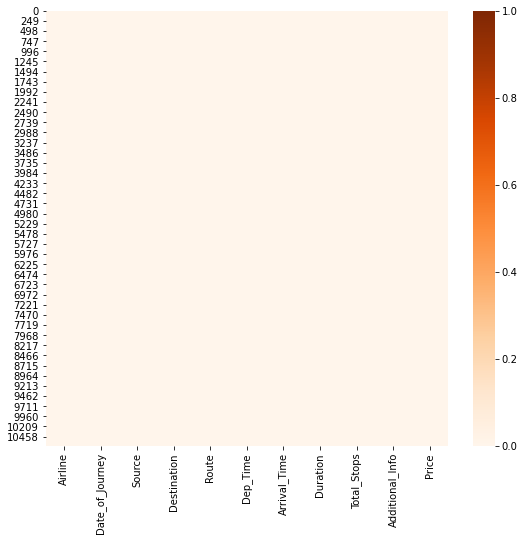

In [37]:
#checking null values in dataset
plt.figure(figsize=(9,8))
sns.heatmap(df.isnull(),cmap='Oranges');#checking null values using heatmap

In [38]:
#checking null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Only one null value in two variable so drop that row

In [41]:
df.dropna(axis=0,inplace=True)#droping the null value rows

In [42]:
#checking null values
df.isnull().sum()#after drop null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [43]:
#shape of the dataset after handling null values 
df.shape

(10682, 11)

10682 rows and 11 columns

In [44]:
#checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


###### Observations:-

1. Int64Index: 10682 entries, 0 to 10682
2. Data columns (total 11 columns)
3. There is no null values in dataset
4. dtypes: int64(1), object(10)
5. memory usage: 1001.4+ KB

In [47]:
#counting the uniques of all variables
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

### More deatils about variables

In [49]:
#checking unique of variable
print(df['Airline'].unique())
#counting the uniques
print(df['Airline'].value_counts())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


many of the customers travel in Jet Airways

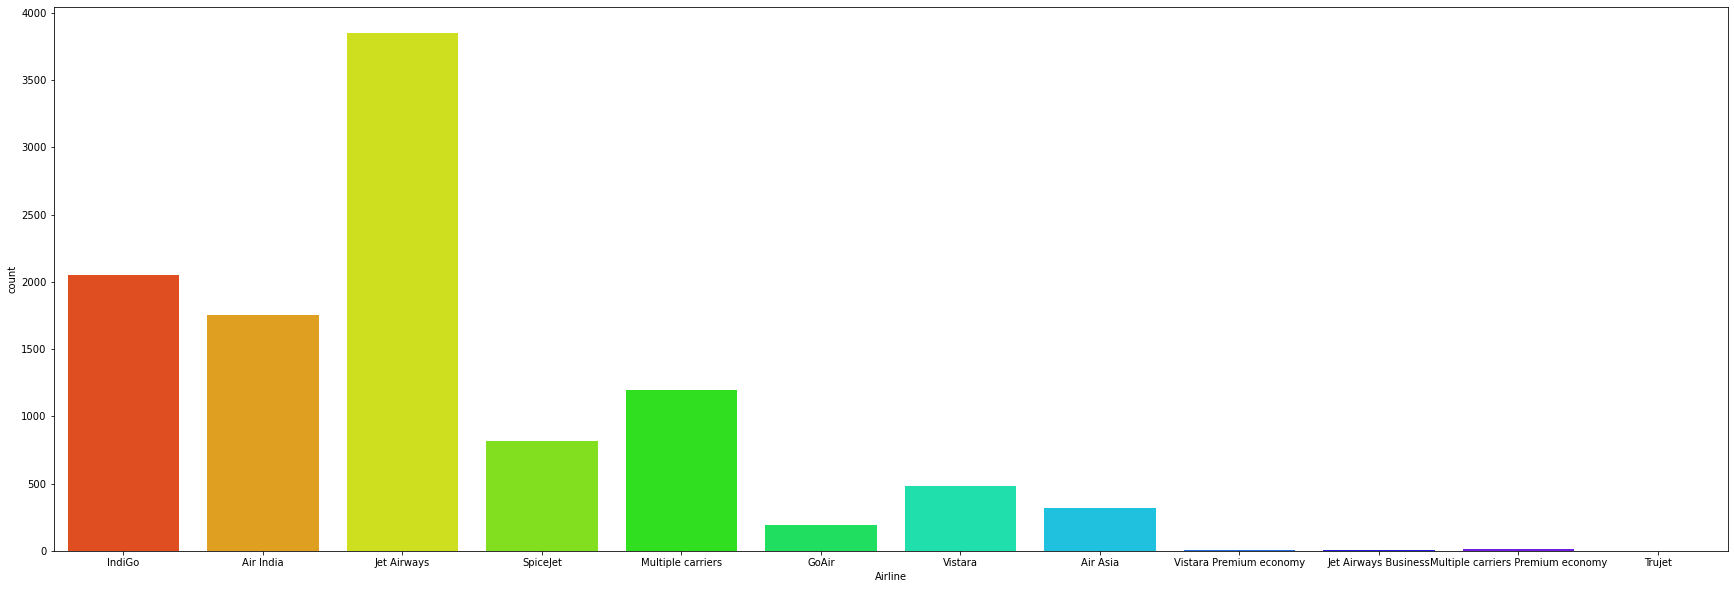

In [58]:
#counting plot
plt.figure(figsize=(30,10))
sns.countplot(df['Airline'],palette='gist_rainbow');

In [61]:
#checking unique of variable
print(df['Source'].unique())
#counting the uniques
print(df['Source'].value_counts())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


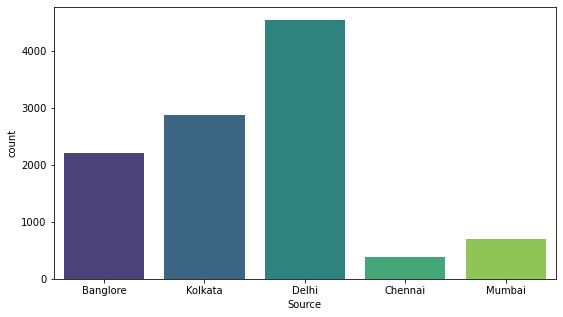

In [67]:
#counting plot
plt.figure(figsize=(9,5))
sns.countplot(df['Source'],palette='viridis');

In [68]:
#checking unique of variable
print(df['Destination'].unique())
#counting the uniques
print(df['Destination'].value_counts())

['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


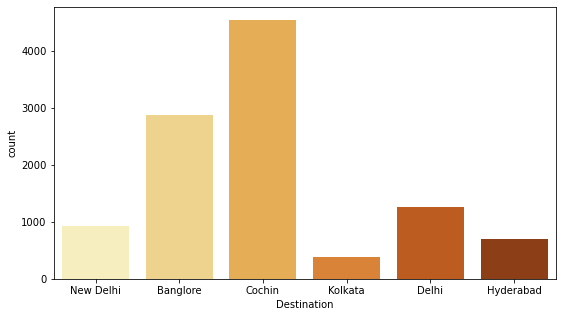

In [71]:
#counting plot
plt.figure(figsize=(9,5))
sns.countplot(df['Destination'],palette='YlOrBr');

In [72]:
#checking unique of variable
print(df['Total_Stops'].unique())
#counting the uniques
print(df['Total_Stops'].value_counts())

['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


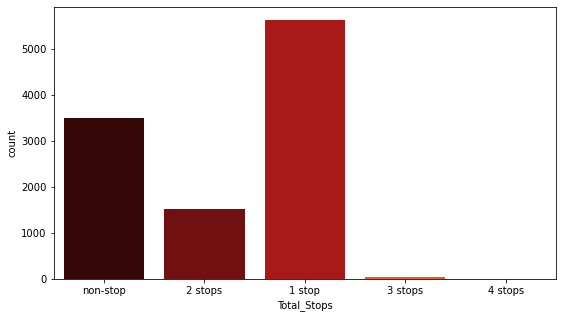

In [74]:
#counting plot
plt.figure(figsize=(9,5))
sns.countplot(df['Total_Stops'],palette='gist_heat');

In [75]:
#checking unique of variable
print(df['Additional_Info'].unique())
#counting the uniques
print(df['Additional_Info'].value_counts())

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


### Feature Engineering

In [79]:
df['Additional_Info']=df['Additional_Info'].replace('No Info','No info')#both are same
df['Additional_Info']=df['Additional_Info'].replace('1 Long layover','long layover')#both are long layover
df['Additional_Info']=df['Additional_Info'].replace('2 Long layover','long layover')
df['Additional_Info']=df['Additional_Info'].replace('1 Short layover','short layover')#short layover

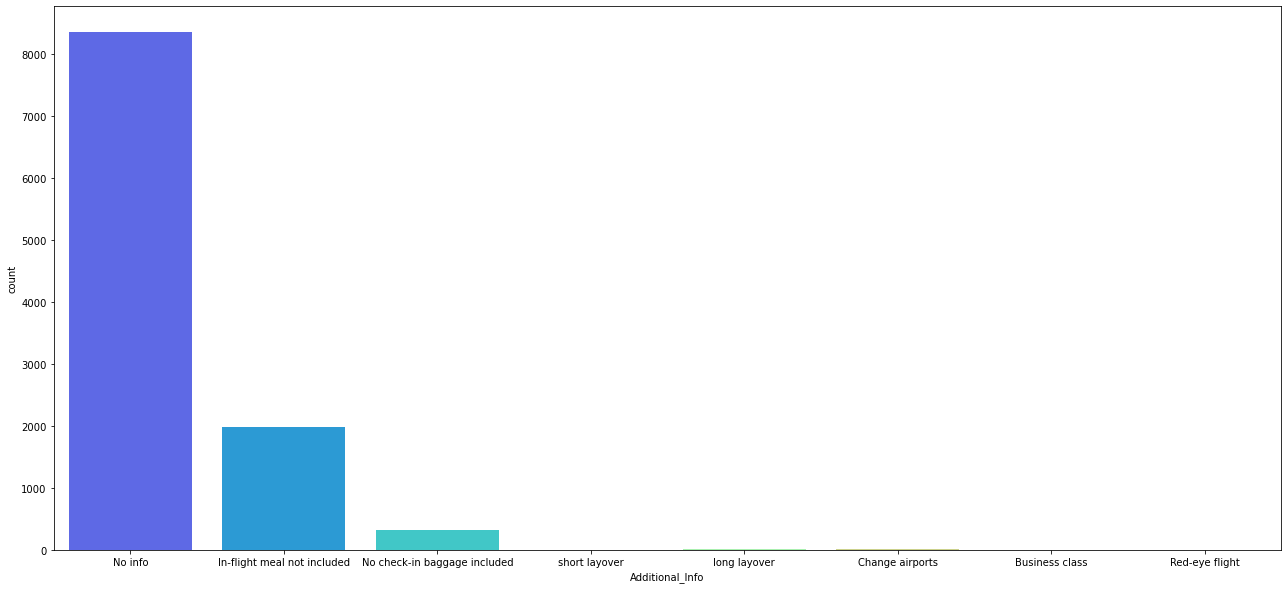

In [83]:
#counting plot
plt.figure(figsize=(22,10))
sns.countplot(df['Additional_Info'],palette='rainbow');

No information are many in additional information column

### Label Encoder

In [84]:
from sklearn.preprocessing import LabelEncoder

In [89]:
df_new=df.drop('Price',axis=1)#droping target variable

In [90]:
#To change object to integer
df1=df_new.apply(LabelEncoder().fit_transform)

In [91]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3,24,0,5,18,211,233,240,4,4
1,1,6,3,0,84,31,906,336,1,4
2,4,43,2,1,118,70,413,106,1,4
3,3,10,3,0,91,164,1324,311,0,4
4,3,0,0,5,29,149,1237,303,0,4


In [92]:
df1['Price']=df['Price']#adding target variable

In [93]:
#after adding target variable(Price)
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,4,3897
1,1,6,3,0,84,31,906,336,1,4,7662
2,4,43,2,1,118,70,413,106,1,4,13882
3,3,10,3,0,91,164,1324,311,0,4,6218
4,3,0,0,5,29,149,1237,303,0,4,13302


In [94]:
#describe dataset
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Airline,10682.0,3.966205,2.352090,0.0,3.0,4.0,4.0,11.0
Date_of_Journey,10682.0,23.733758,12.337569,0.0,14.0,24.0,35.0,43.0
Source,10682.0,1.952256,1.177276,0.0,2.0,2.0,3.0,4.0
Destination,10682.0,1.436154,1.474845,0.0,0.0,1.0,2.0,5.0
Route,10682.0,74.820165,36.729039,0.0,48.0,73.0,104.0,127.0
Dep_Time,10682.0,107.983898,61.087537,0.0,55.0,96.0,164.0,221.0
Arrival_Time,10682.0,869.846564,331.519717,0.0,603.0,937.0,1141.0,1342.0
Duration,10682.0,194.072177,108.625225,0.0,106.0,233.0,280.0,367.0
Total_Stops,10682.0,1.458248,1.806320,0.0,0.0,0.0,4.0,4.0
Additional_Info,10682.0,3.599607,0.795109,0.0,4.0,4.0,4.0,7.0


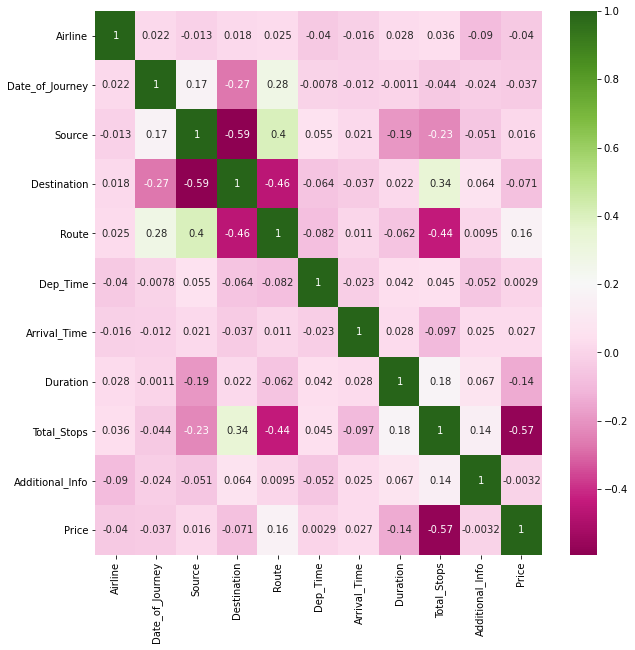

In [100]:
#checking Correlation of datset using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap='PiYG');

Greens is positive correlation and pink is negative correlation

In [101]:
#checking correlation
df1.corr()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022390,-0.013397,0.018446,0.025214,-0.039508,-0.015804,0.027886,0.035973,-0.090339,-0.039565
Date_of_Journey,0.022390,1.000000,0.167555,-0.273343,0.275121,-0.007776,-0.012445,-0.001137,-0.044069,-0.024382,-0.036907
Source,-0.013397,0.167555,1.000000,-0.592576,0.403412,0.055194,0.020847,-0.192009,-0.225605,-0.051430,0.015999
Destination,0.018446,-0.273343,-0.592576,1.000000,-0.461176,-0.063625,-0.036847,0.022029,0.337872,0.064145,-0.071122
Route,0.025214,0.275121,0.403412,-0.461176,1.000000,-0.082013,0.010604,-0.062078,-0.437749,0.009463,0.164149
Dep_Time,-0.039508,-0.007776,0.055194,-0.063625,-0.082013,1.000000,-0.023325,0.041605,0.044647,-0.051566,0.002931
Arrival_Time,-0.015804,-0.012445,0.020847,-0.036847,0.010604,-0.023325,1.000000,0.027731,-0.097180,0.025221,0.027358
Duration,0.027886,-0.001137,-0.192009,0.022029,-0.062078,0.041605,0.027731,1.000000,0.175191,0.067063,-0.144280
Total_Stops,0.035973,-0.044069,-0.225605,0.337872,-0.437749,0.044647,-0.097180,0.175191,1.000000,0.137085,-0.571221
Additional_Info,-0.090339,-0.024382,-0.051430,0.064145,0.009463,-0.051566,0.025221,0.067063,0.137085,1.000000,-0.003175


###### Observations:-

1. Source and Route variables are Positive correlation with Date_of_Journey
2. Route High Positive correlation with Source Variable
3. Destination Highly Negative Correlation with Source
4. Route is Highly Negative correlation with Destination
5. Total Stops variable are good(positive) correlation with Destination
6. Total Stops are Negative Correlation with Route and Price Variable(Target variable)
7. Route is Positive correlation with Price(It means that most of flight price depends on Route)

In [103]:
#Target variable correlation
df_target=df1.corr()
df_target['Price'].sort_values(ascending=False)

Price              1.000000
Route              0.164149
Arrival_Time       0.027358
Source             0.015999
Dep_Time           0.002931
Additional_Info   -0.003175
Date_of_Journey   -0.036907
Airline           -0.039565
Destination       -0.071122
Duration          -0.144280
Total_Stops       -0.571221
Name: Price, dtype: float64

###### Observations:-

1. Route is High correlation with Price
2. Arrivel Time and Source also good Correlation with Price
3. Most of Flight Price Depends on Route.
4. And Also Little depends on Arrival time and Source
5. Total Stops are High Negative Correlation

### Scatter Plots

In [104]:
sns.set_theme()

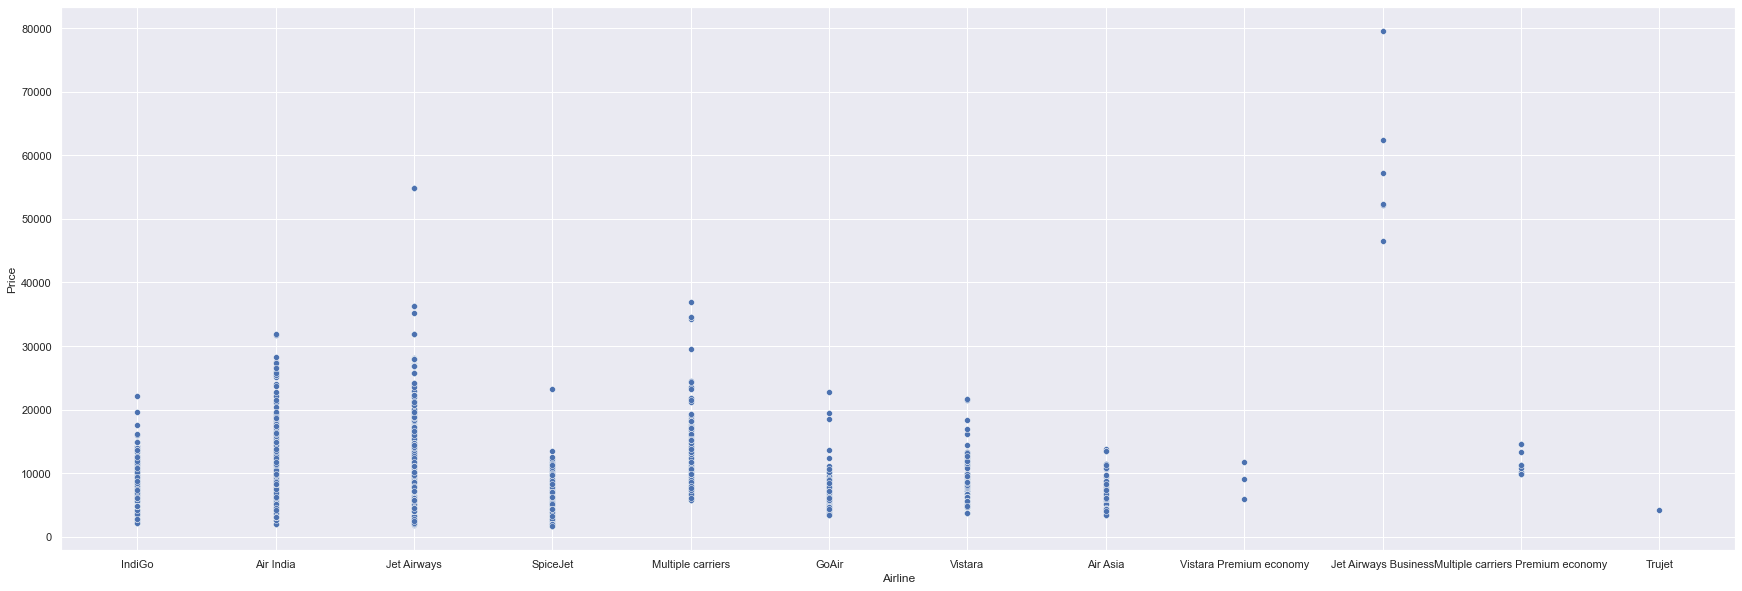

In [114]:
plt.figure(figsize=(30,10))
sns.scatterplot(df['Airline'],df['Price']);

Jet Airways Business Airline are the High Price Airline and Trujet Airline Low Price Airline

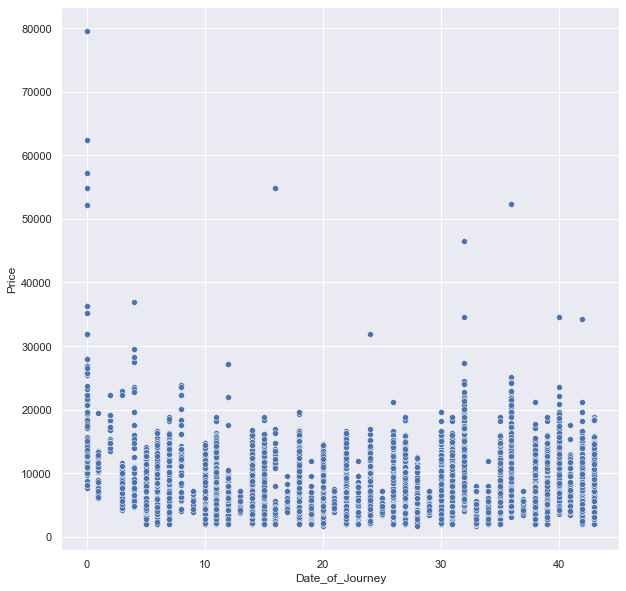

In [117]:
plt.figure(figsize=(10,10))
sns.scatterplot(df1['Date_of_Journey'],df1['Price']);

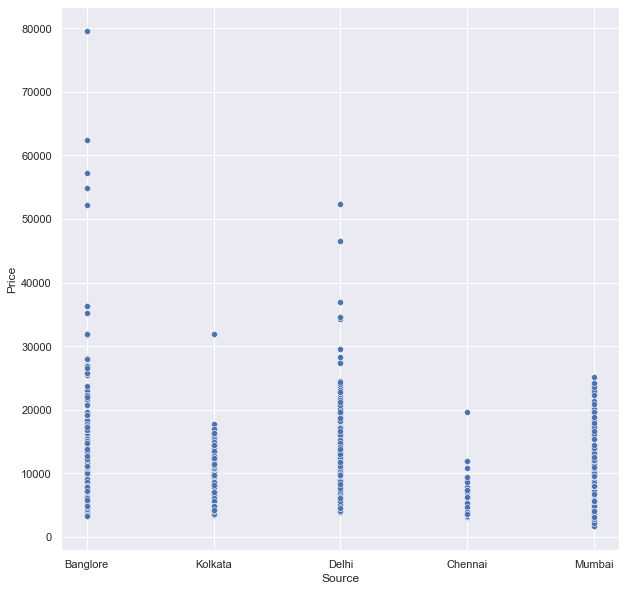

In [118]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['Source'],df['Price']);

Bangalore and Delhi source as High Price and Chennai source are low price 

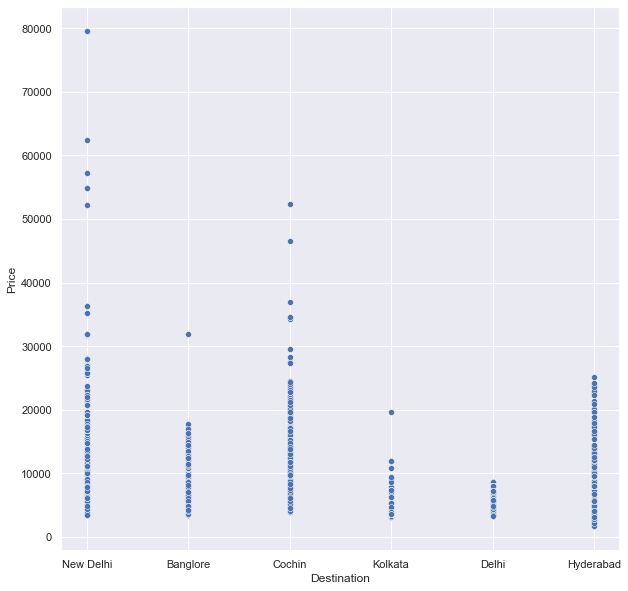

In [119]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['Destination'],df['Price']);

New Delhi Destination are High Flight Price And Delhi Destination are low Flight Price

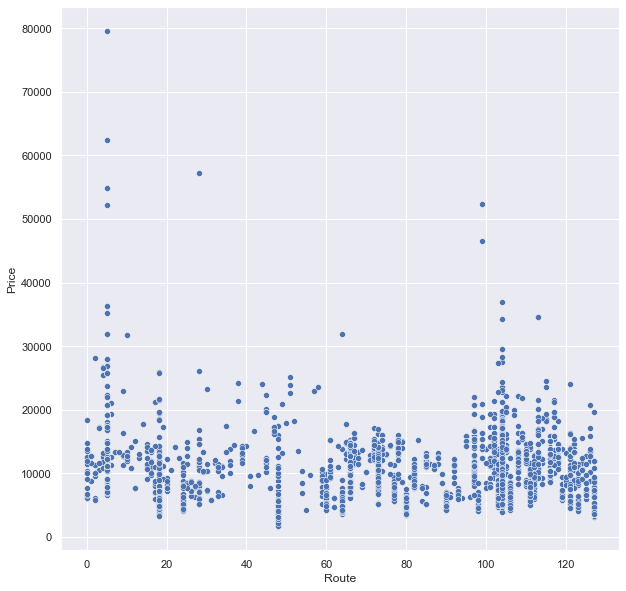

In [125]:
plt.figure(figsize=(10,10))
sns.scatterplot(df1['Route'],df1['Price']);

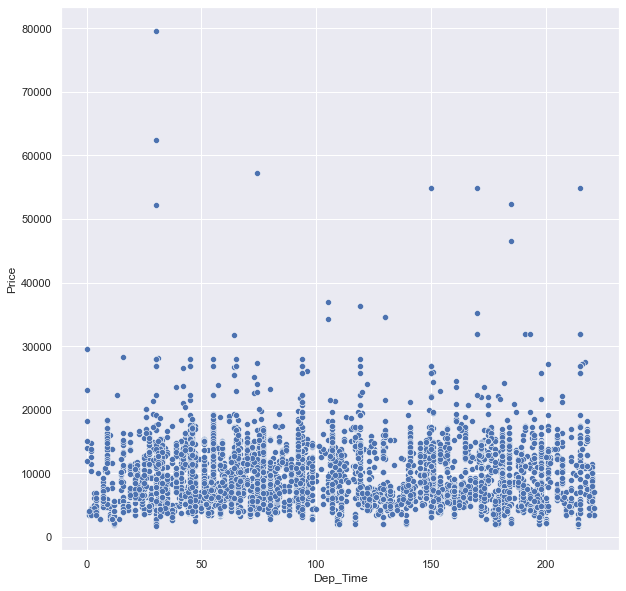

In [126]:
plt.figure(figsize=(10,10))
sns.scatterplot(df1['Dep_Time'],df1['Price']);

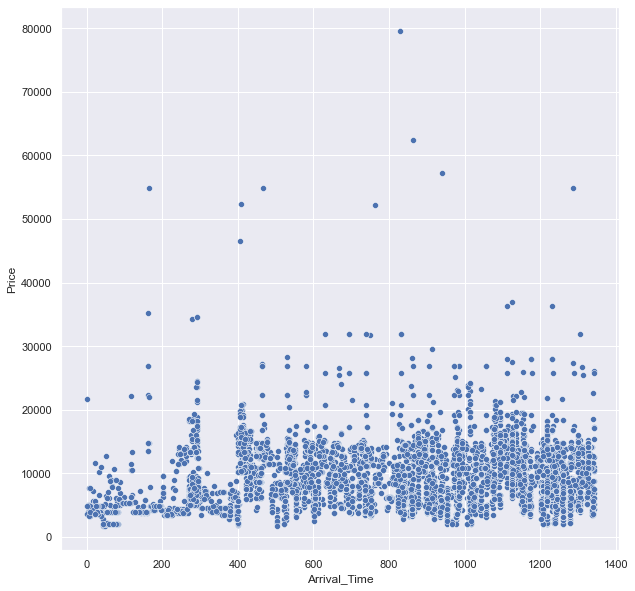

In [127]:
plt.figure(figsize=(10,10))
sns.scatterplot(df1['Arrival_Time'],df1['Price']);

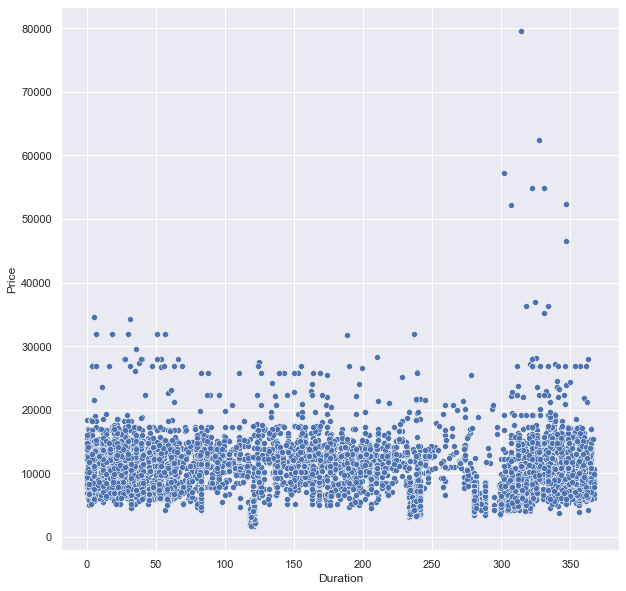

In [128]:
plt.figure(figsize=(10,10))
sns.scatterplot(df1['Duration'],df1['Price']);

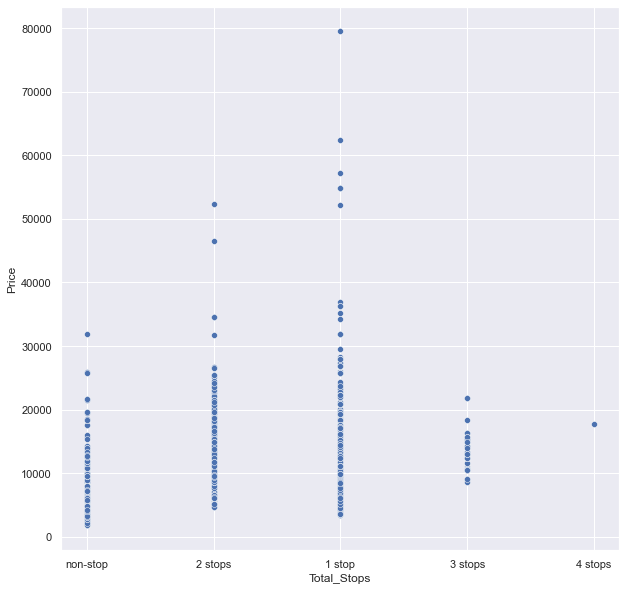

In [129]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['Total_Stops'],df['Price']);

Only 1 stop are High prices and Non stop also Low prices that low destination or duration

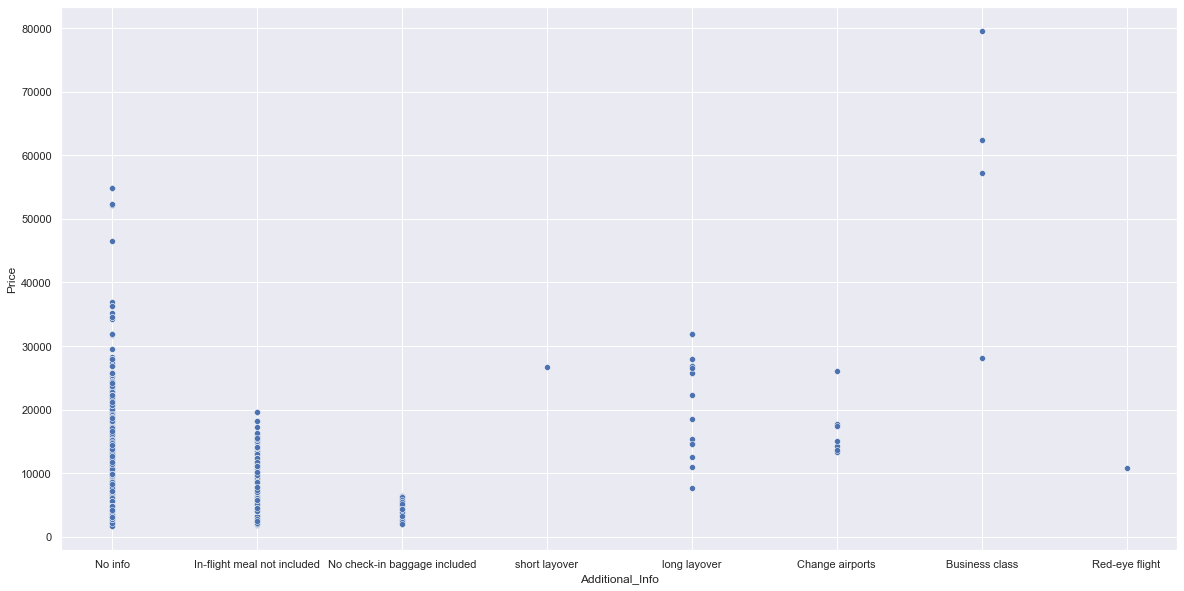

In [132]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['Additional_Info'],df['Price']);

Business Class Are High Flight Price and No check-in baggage included are low flight price

### Pair Plot

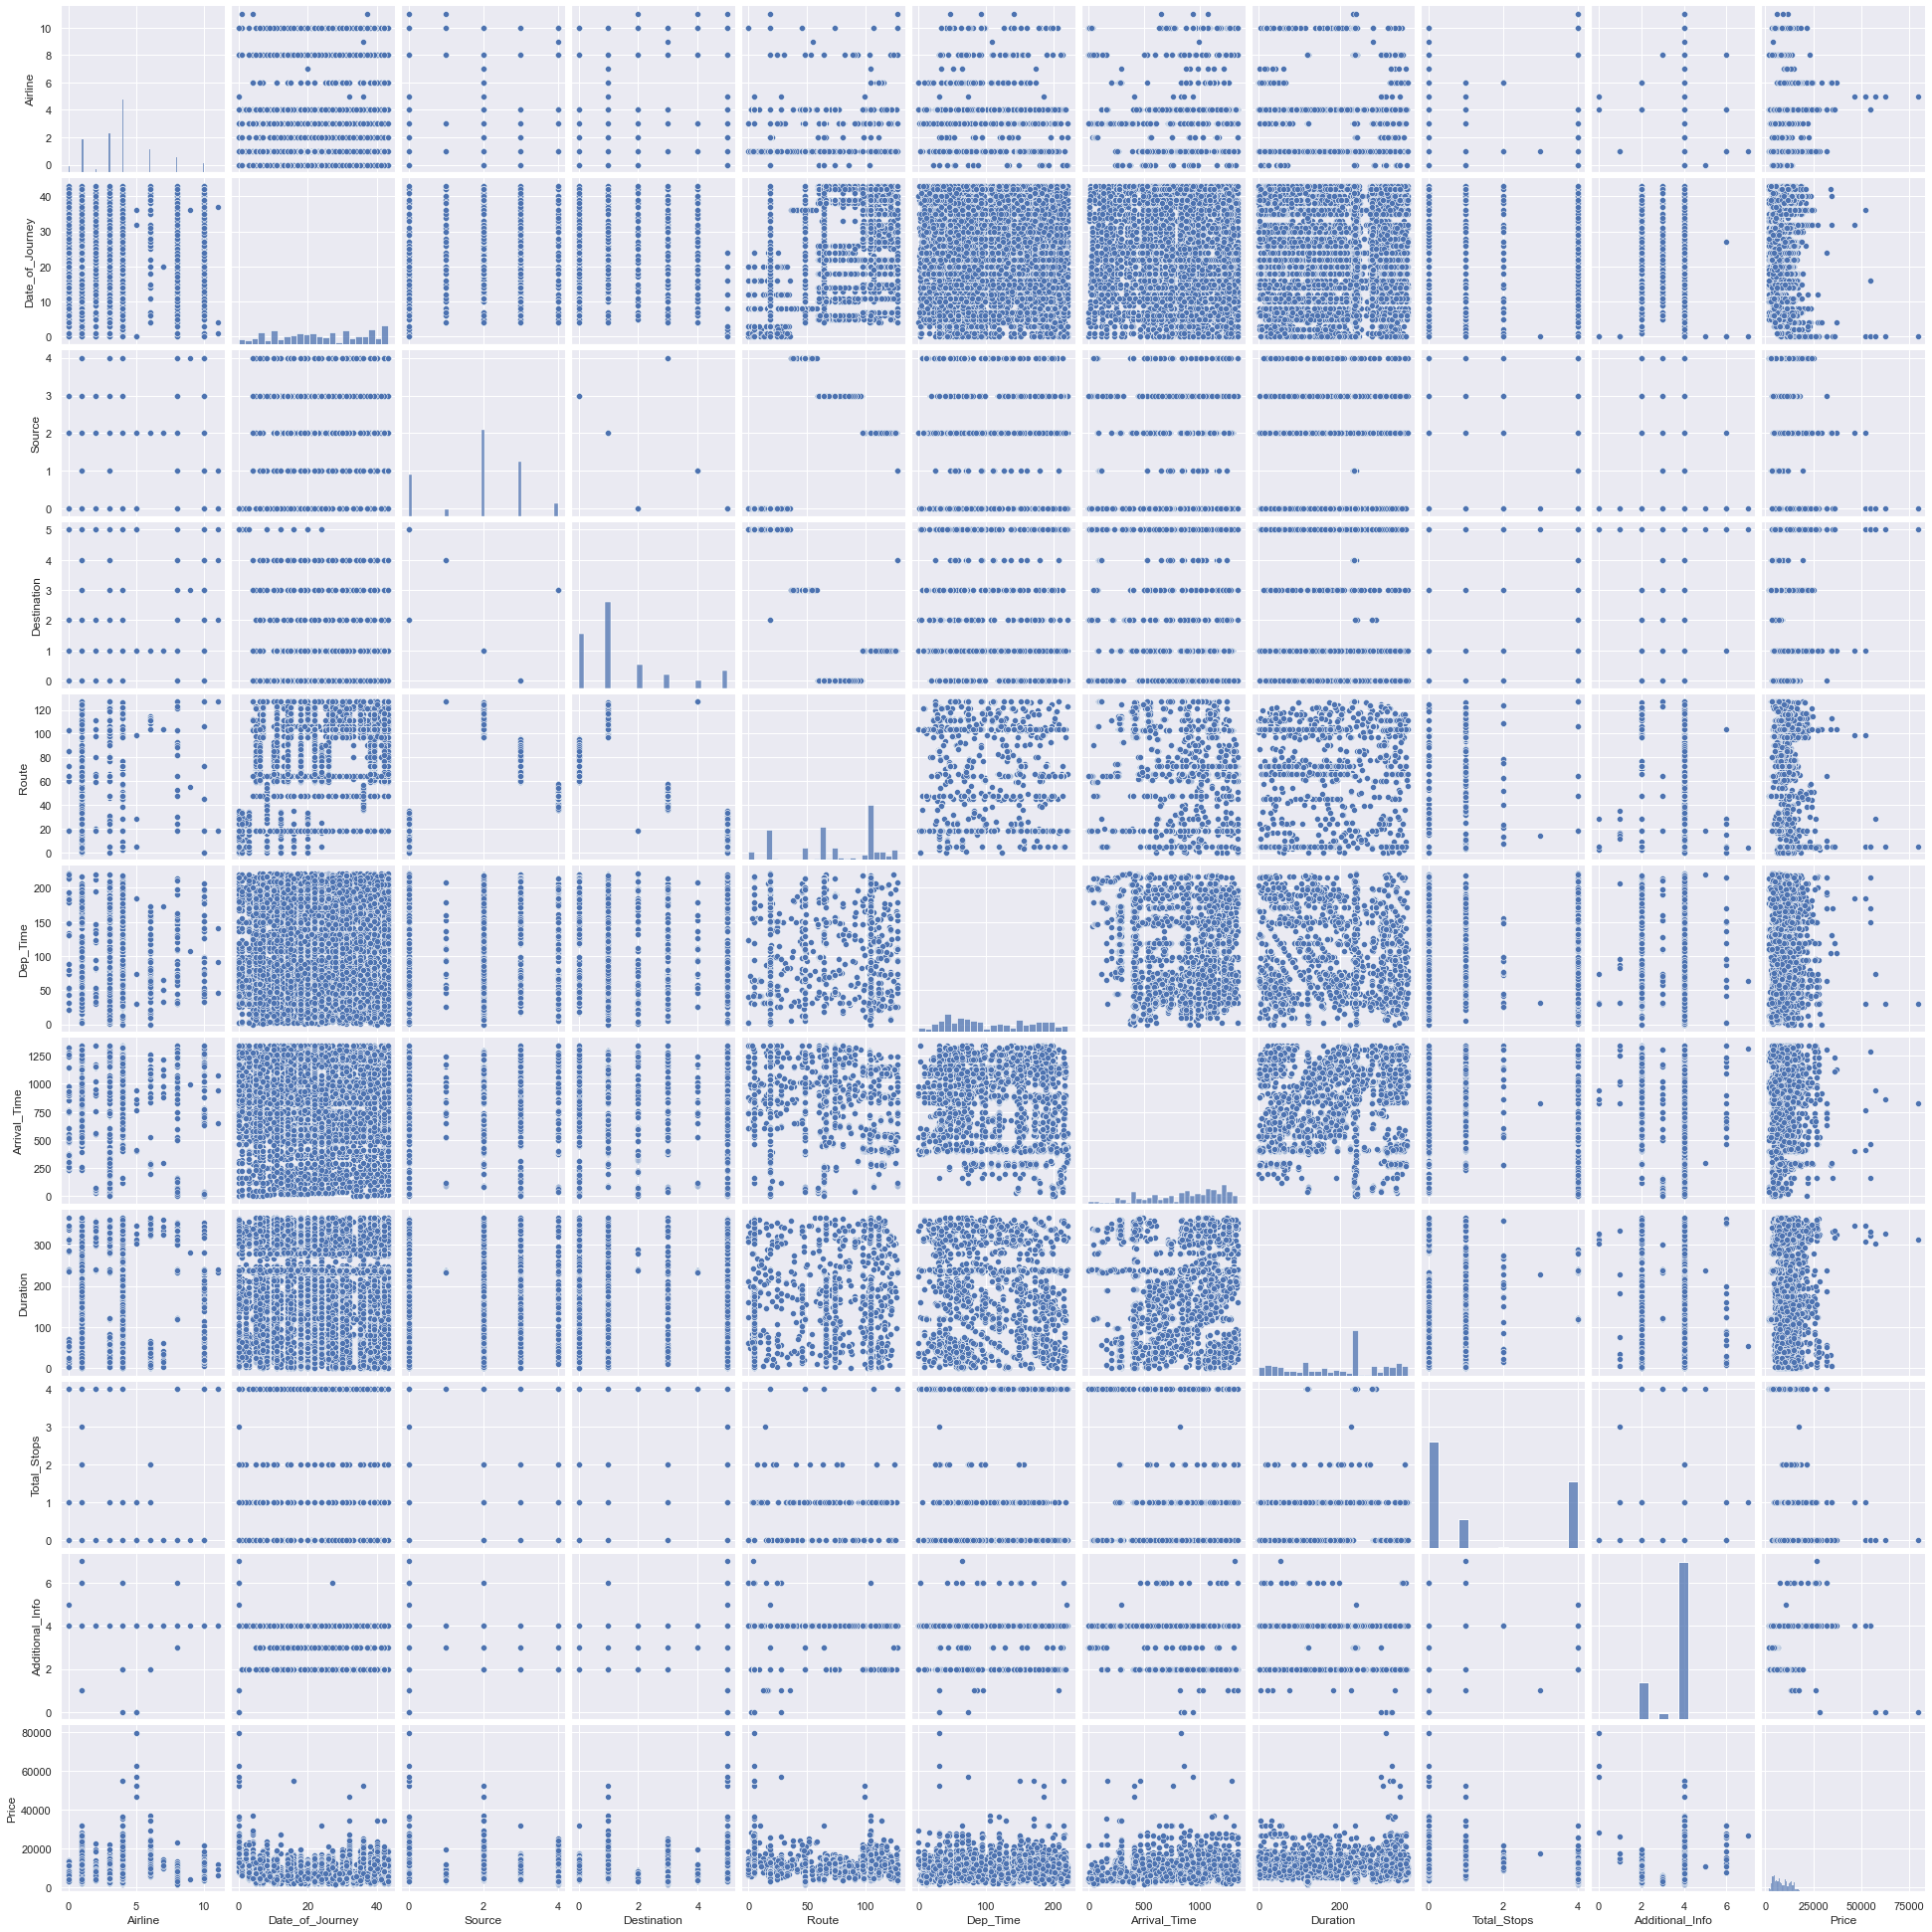

In [133]:
sns.pairplot(df1)

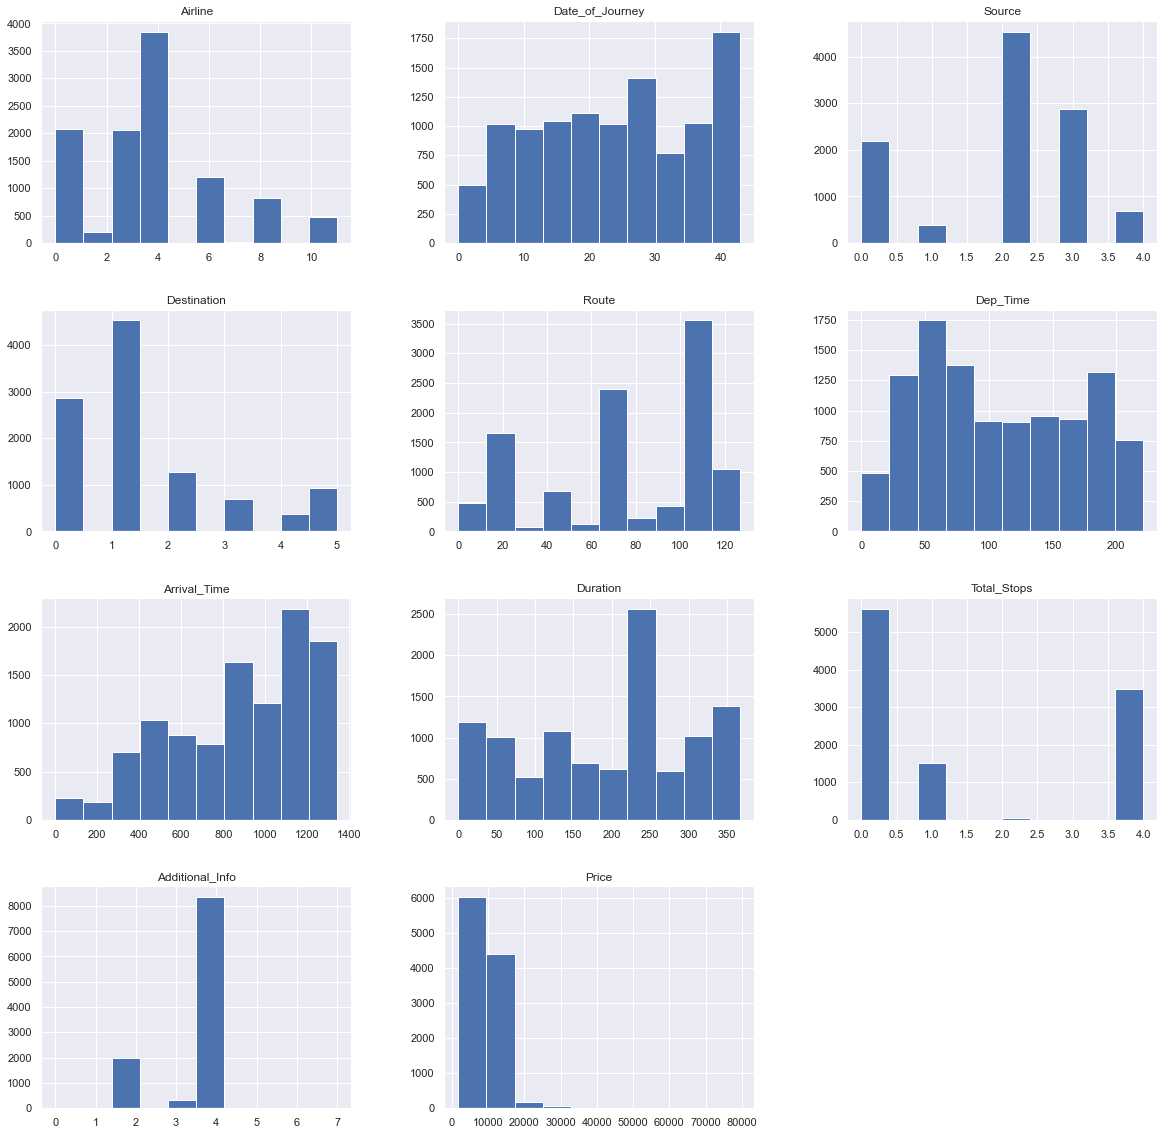

In [137]:
df1.hist(layout=(4,3),figsize=(20,20));

### Checking Outliers

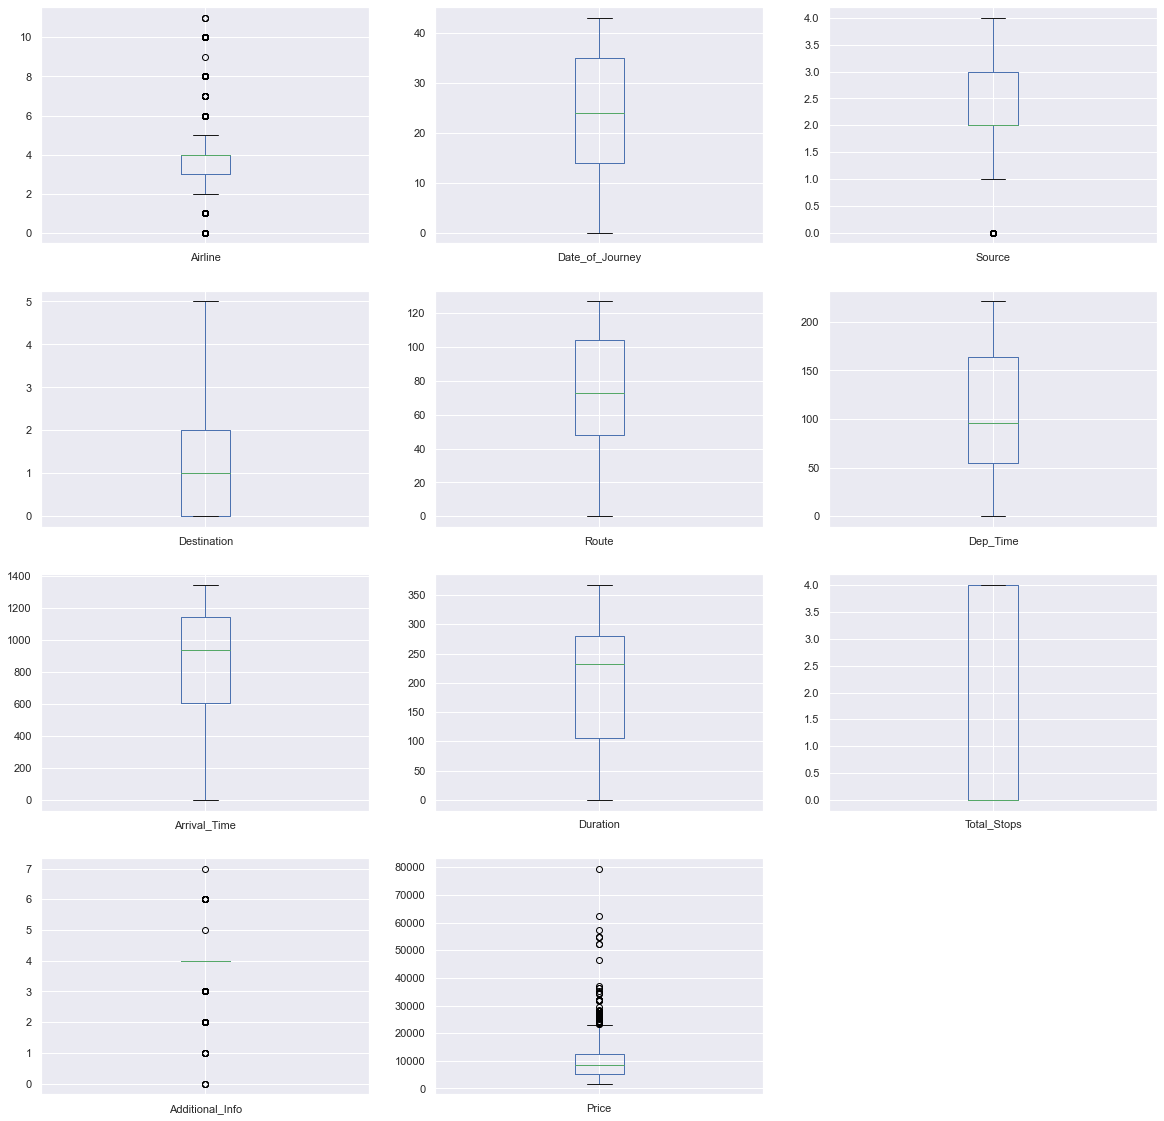

In [138]:
df1.plot(kind='box',subplots=True,layout=(4,3),figsize=(20,20));

In [139]:
#Removing outliers
from scipy.stats import zscore

In [140]:
z=np.abs(zscore(df1))

In [141]:
threshold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1712,  1785,  1918,  2055,
        2079,  2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,
        2618,  2635,  2693,  2883,  2924,  2924,  3032,  3032,  3111,
        3111,  3257,  3400,  3535,  3535,  3700,  3700,  3788,  4012,
        4521,  4521,  4676,  4829,  5013,  5013,  5136,  5372,  5372,
        5439,  5628,  5662,  5701,  5710,  5719,  5738,  5745,  5856,
        5986,  6024,  6314,  6336,  6407,  6576,  6576,  6588,  6605,
        6991,  7351,  7356,  7377,  7537,  7554,  7617,  7713,  7724,
        7724,  7756,  7902,  8020,  8080,  8451,  8470,  8536,  8598,
        8856,  8897,  8940,  8957,  8957,  8990,  9019,  9019,  9181,
        9192,  9238,  9478,  9631,  9656,  9714,  9973, 10051, 10112,
       10148, 10159, 10181, 10188, 10352, 10363, 10363, 10382, 10438,
       10510, 10510

In [142]:
#removing outliers
df1=df1[(z<3).all(axis=1)]

In [143]:
#shape of dataset after removing outliers
df1.shape

(10571, 11)

### Checking Skewness

In [145]:
x=df1.drop('Price',axis=1)
y=df1.iloc[:,-1]

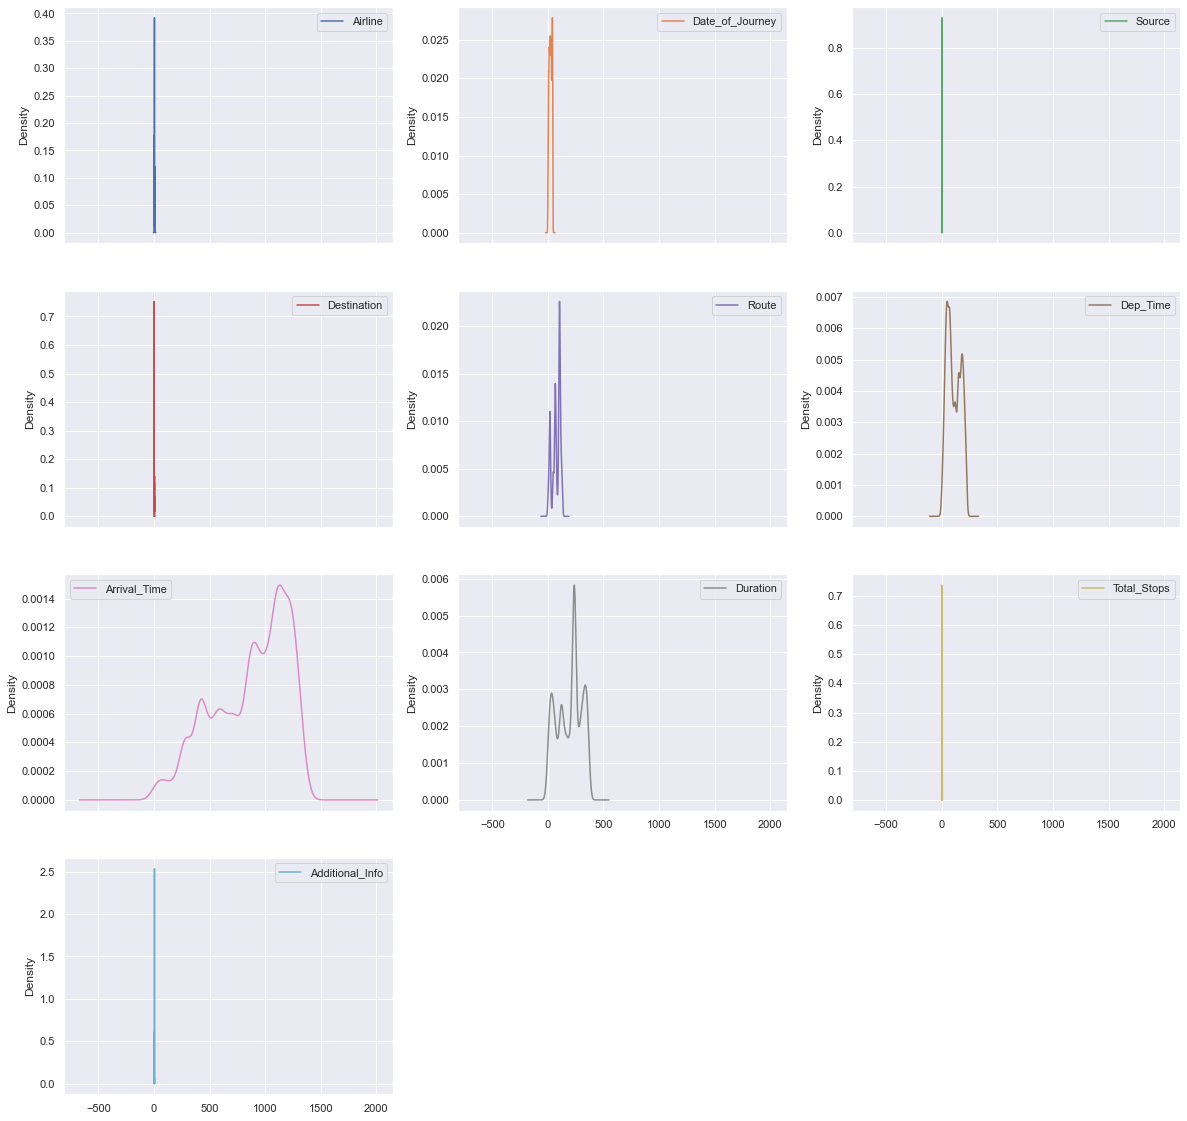

In [147]:
x.plot(kind='density',subplots=True,layout=(4,3),figsize=(20,20));

In [148]:
#checking skewness
x.skew().sort_values(ascending=False)

Destination        1.271177
Airline            0.731440
Total_Stops        0.617741
Dep_Time           0.193500
Date_of_Journey   -0.060995
Duration          -0.216404
Source            -0.440273
Route             -0.512532
Arrival_Time      -0.607954
Additional_Info   -1.477711
dtype: float64

In [149]:
#Removing Skewness
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [150]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipe=Pipeline(steps=[('s',scaler),('p',power)])

In [151]:
data=pipe.fit_transform(x)

In [152]:
x=pd.DataFrame(data,columns=x.columns)

### VIF(Variance Inflation Factor)

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [155]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [156]:
vif()

,Variables,VIF Factor
0,Airline,1.048008
1,Date_of_Journey,1.085025
2,Source,1.631928
3,Destination,1.769917
4,Route,1.305627
5,Dep_Time,1.036367
6,Arrival_Time,1.024066
7,Duration,1.090218
8,Total_Stops,1.391174
9,Additional_Info,1.071159


In [158]:
#Additional_Info,Duration as same vif factor
x.drop('Additional_Info',axis=1,inplace=True)
#Total_Stops,Route as same vif factor Total_Stops are high negative correlation so drop Total_Stops
x.drop('Total_Stops',axis=1,inplace=True)

### Standard Scaler

In [159]:
#make Input data into standard scale
scale=MinMaxScaler()
x=scale.fit_transform(x)

In [160]:
#shape of input variables
x.shape

(10571, 8)

In [161]:
#shape of output variable
y.shape

(10571,)

### Model Selection

In [169]:
#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error

In [170]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()
lasso=Lasso()
ridge=Ridge()

In [171]:
list_models=[lr,dtr,knr,svr,rfr,gbr,abr,lasso,ridge]

### LinearRegression

In [172]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.14430756432306402 Random Number: 83


In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=83)
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
pred=lr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.14430756432306402
mean_absolute_error: 3153.531751408097
mean_squared_error: 15140711.217805324
mean_squared_log_error: 0.2178592100202273
r2_score: -5.423637521731826


### DecisionTreeRegressor

In [173]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtr.fit(x_train,y_train)
    score=dtr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.9683570308537148 Random Number: 63


In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=63)
dtr.fit(x_train,y_train)
print(dtr.score(x_train,y_train))
pred=dtr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.9683570308537148
mean_absolute_error: 1492.1296080285836
mean_squared_error: 5836872.424984675
mean_squared_log_error: 0.06407120154059164
r2_score: 0.6312820653323646


### KNeighborsRegressor

In [174]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    knr.fit(x_train,y_train)
    score=knr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.7813789232027654 Random Number: 61


In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=61)
knr.fit(x_train,y_train)
print(knr.score(x_train,y_train))
pred=knr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.7813789232027654
mean_absolute_error: 1810.748234552333
mean_squared_error: 6585196.567881463
mean_squared_log_error: 0.07376879635242285
r2_score: 0.44563609562007955


### Support Vector Regressor

In [180]:
maxscore=0
maxrn=0
for i in [22,33,44,55]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svr.fit(x_train,y_train)
    score=svr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
    print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.02082870468938569 Random Number: 22
Maximum score: 0.023221691579453307 Random Number: 33
Maximum score: 0.025300531302103302 Random Number: 44
Maximum score: 0.025300531302103302 Random Number: 44


In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=44)
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred=svr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.025300531302103302
mean_absolute_error: 3378.4663420929755
mean_squared_error: 16019820.040979475
mean_squared_log_error: 0.24726046551724645
r2_score: -331.1041521640856


### RandomForestRegressor

In [183]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfr.fit(x_train,y_train)
    score=rfr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.9509017439894637 Random Number: 52


In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=52)
rfr.fit(x_train,y_train)
print(rfr.score(x_train,y_train))
pred=rfr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.9507372218992464
mean_absolute_error: 1289.6661836918772
mean_squared_error: 3613940.3143963674
mean_squared_log_error: 0.04152523338912527
r2_score: 0.74417958695403


### GradientBoostingRegressor

In [186]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gbr.fit(x_train,y_train)
    score=gbr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.7586726234703978 Random Number: 53


In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=53)
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
pred=gbr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.7586726234703979
mean_absolute_error: 1604.0921994687492
mean_squared_error: 4459859.2156077875
mean_squared_log_error: 0.052106409805845744
r2_score: 0.580490746505099


### AdaBoostRegressor

In [190]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    abr.fit(x_train,y_train)
    score=abr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.5259004569663985 Random Number: 91


In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=91)
abr.fit(x_train,y_train)
print(abr.score(x_train,y_train))
pred=abr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.48206740968510997
mean_absolute_error: 2558.3580180164186
mean_squared_error: 9086917.567377273
mean_squared_log_error: 0.15234381044654316
r2_score: -0.8744837349230836


### Lasso Regressor

In [192]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lasso.fit(x_train,y_train)
    score=lasso.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.14429822813460147 Random Number: 83


In [194]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=83)
lasso.fit(x_train,y_train)
print(lasso.score(x_train,y_train))
pred=lasso.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.14429822813460147
mean_absolute_error: 3153.8505058616656
mean_squared_error: 15135517.668045696
mean_squared_log_error: 0.2179275024605777
r2_score: -5.495697196018406


### Ridge Regressor

In [195]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    ridge.fit(x_train,y_train)
    score=ridge.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.14430661059532823 Random Number: 83


In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=83)
ridge.fit(x_train,y_train)
print(ridge.score(x_train,y_train))
pred=ridge.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.14430661059532823
mean_absolute_error: 3153.6957695050232
mean_squared_error: 15139019.64133398
mean_squared_log_error: 0.21787931995259002
r2_score: -5.4510649464515


### Cross Validation

In [198]:
for model in list_models:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())

LinearRegression()
[0.14145878 0.13604227 0.11036954 0.11730992 0.13437712]
0.1279115270817003
DecisionTreeRegressor()
[0.69468359 0.67339501 0.71408917 0.6555365  0.66042553]
0.6796259595301023
KNeighborsRegressor()
[0.6709406  0.67513793 0.65449092 0.63373434 0.63956257]
0.6547732733584939
SVR()
[0.03053147 0.01117889 0.03220255 0.03781957 0.02514569]
0.027375634422538365
RandomForestRegressor()
[0.79344859 0.77983334 0.80779023 0.76922326 0.76877361]
0.783813806150698
GradientBoostingRegressor()
[0.73624207 0.73338102 0.74921012 0.72787287 0.744047  ]
0.7381506141909967
AdaBoostRegressor()
[0.42740648 0.3725456  0.49196017 0.47173506 0.47058011]
0.4468454856147169
Lasso()
[0.1412469  0.13611551 0.11052469 0.11754205 0.13423397]
0.12793262628499996
Ridge()
[0.14140656 0.13603054 0.11043211 0.11738925 0.13432208]
0.12791610902762013


### RandomForestRegressor is best Model

In [199]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=52)
rfr.fit(x_train,y_train)
print(rfr.score(x_train,y_train))
pred=rfr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.9506992467702101
mean_absolute_error: 1294.7095154223052
mean_squared_error: 3657093.3609057297
mean_squared_log_error: 0.041762569391012215
r2_score: 0.7405857115090793


### Hyperparameters for a model

In [205]:
random_forest_params={'max_features': ['auto', 'sqrt', 'log2']}

In [206]:
rfr_grid = GridSearchCV(rfr, random_forest_params, cv=5)
rfr_grid.fit(x_train,y_train)
print('Best score:', rfr_grid.best_score_)
print('Best score:', rfr_grid.best_params_)
print('Best score:', rfr_grid.best_estimator_)

Best score: 0.7870020441472987
Best score: {'max_features': 'auto'}
Best score: RandomForestRegressor()


### Save the Model

In [207]:
import joblib

In [209]:
#save the model
joblib.dump(rfr,'flight_price_prediction_rfr.obj')

['flight_price_prediction_rfr.obj']

In [210]:
#load the model
load_model=joblib.load('flight_price_prediction_rfr.obj')

##### Test Dataset

In [213]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [214]:
df_test=df_test.apply(LabelEncoder().fit_transform)

In [217]:
df_test.drop('Additional_Info',axis=1,inplace=True)
df_test.drop('Total_Stops',axis=1,inplace=True)

In [221]:
df_test=MinMaxScaler().fit_transform(df_test)

In [222]:
#test the model using test dataset
load_model.predict(df_test)

array([ 7273.11      ,  6244.05      ,  5984.23      , ...,
        8786.41      , 10043.31333333, 12418.86      ])